In [15]:
import os

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

from root import ROOT_DIR
from weighted_mean_prediction.data_setup import get_encoded_split_data
from weighted_mean_prediction.random_forest.model_data_helpers import save_model, load_rf_model
from weighted_mean_prediction.regression_performance import evaluate_model, get_all_metrics

In [16]:
def train_base_model(X_train: pd.DataFrame, y_train: pd.DataFrame,
                     file_path: str) -> RandomForestRegressor:
    model = RandomForestRegressor(random_state=0)
    model.fit(X_train, y_train)
    save_model(model, file_path)
    return model

In [17]:
model_dir = f"{ROOT_DIR}/weighted_mean_prediction/random_forest/models"
model_path = os.path.join(model_dir, "base_rf_model.joblib")

In [18]:
X_train, _, X_test, y_train, _, y_test = get_encoded_split_data()

rf = load_rf_model(model_path)
rf = rf if rf is not None else train_base_model(X_train, y_train["weighted_mean"], model_path)

In [19]:
predictions, errors = evaluate_model(rf, X_test, y_test["weighted_mean"])

In [ ]:
for k, v in get_all_metrics(y_test, predictions).items():
    print(f"{k}: {v}")

In [23]:
importances = rf.feature_importances_

In [24]:
for idx, importance in enumerate(importances):
    print(f"{X_train.columns[idx]} : {importance}")

0 : 0.007865448259999989
1 : 0.006461379183760396
2 : 0.008316254717610468
3 : 0.007064202001030457
4 : 0.006551803009085934
5 : 0.008248269844861024
6 : 0.007173758957398306
7 : 0.00823789169808416
8 : 0.007837438121162763
9 : 0.013400551364372808
10 : 0.017370484009502318
11 : 0.0141320220769113
12 : 0.017061727277213397
13 : 0.01640069530020304
14 : 0.014965635830140519
15 : 0.012761237829092109
16 : 0.013899277515981901
17 : 0.009911639133792213
18 : 0.009271444522144004
19 : 0.007052451409331255
20 : 0.008410608153731784
21 : 0.007983248128053297
22 : 0.008640039123713993
23 : 0.007041228301705905
24 : 0.009126174730991284
25 : 0.013270727511957252
26 : 0.022303675618783464
27 : 0.007967285154374148
28 : 0.007121233839310456
29 : 0.006955989437819602
30 : 0.007445422453211654
31 : 0.007382248667945393
32 : 0.006774728428401612
33 : 0.007556206752527288
34 : 0.006789419039207426
35 : 0.006424002873253105
dG_pairing : 0.5252661756842328
dG_folding : 0.11955797403910116


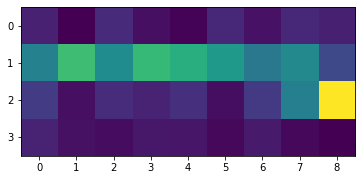

In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(importances[:-2].view().reshape((4, 9 )))
plt.show()